#### 1) Import the data file from [UCI repo](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) and store it as a pandas dataframe
(import the necessary library to perform this task. Same goes with all the other tasks)

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'], header=None)
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 2) Group the dataset by 'species' and find the mean of every group
refer: [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [5]:

df.groupby(df.species).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


#### 3) Similarly instead of mean, display the distribution of each species 
refer: [Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

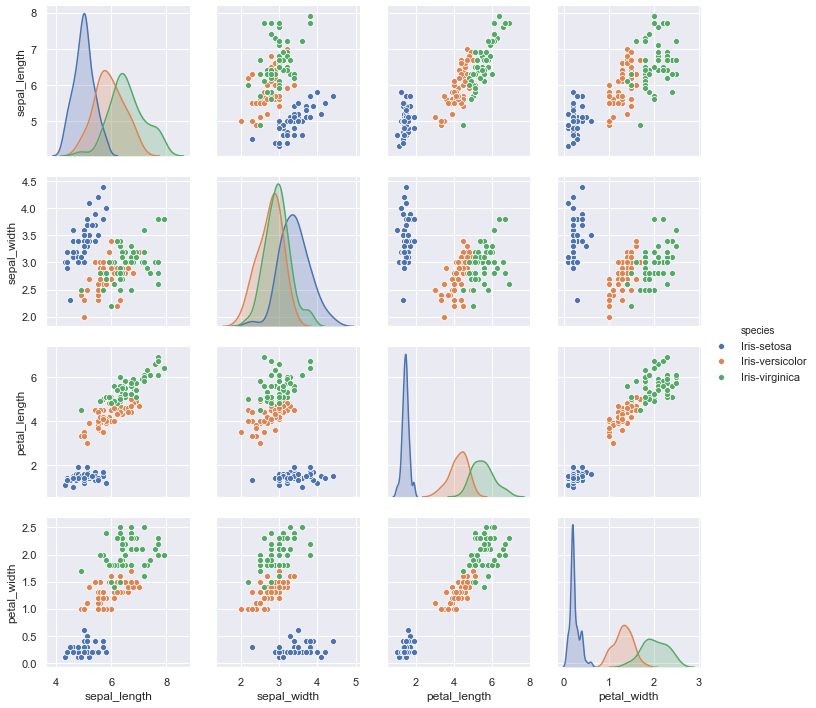

In [3]:
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

sns.pairplot(df,hue='species', diag_kind='kde')
plt.show()

#### 4) Create a barplot to show the distribution of the target variable

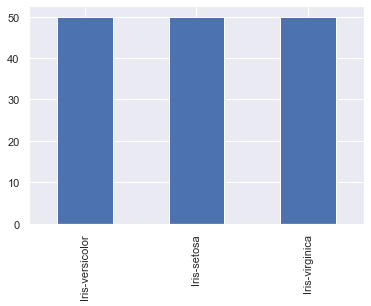

In [4]:
df.species.value_counts().plot(kind='bar')

#### 5) Seperate the data into dependant and independant variables

In [6]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 6) Split the data into X_train, y_train, X_test, y_test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y)

#### 7) Plot the distributions of y_train and y_test seperately using a barchart

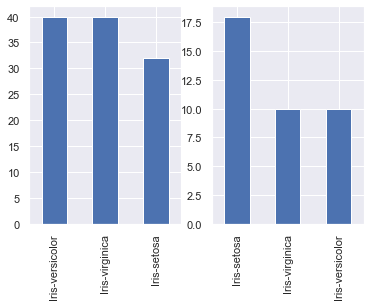

In [12]:
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar')
plt.show()

#### 8) Repeat step 6, but this time, set the parameter stratify = y
train_test_split(X, y, stratify = y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y)

#### 9) Repeat step 7

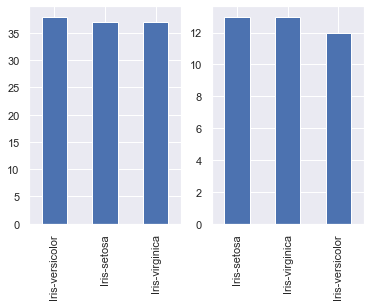

In [15]:
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar')
plt.show()

#### 10) Train a logistic regression model using the train data, print the accuracy on the test data

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'lbfgs', multi_class= 'multinomial')

lr.fit(X_train, y_train)

print(f"Accuracy of logistic regression model = {lr.score(X_test, y_test)}")


Accuracy of logistic regression model = 0.9736842105263158


C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### 11) Repeat step 10 but, replace Logistic regression with [Naive Bayes'](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)     - Optional step

In [23]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()

nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
print(f"Accuracy of logistic regression model = {nb.score(X_test, y_test)}")

Accuracy of logistic regression model = 1.0
